## Decision Tree Visualization

### Decision Tree
Decision tree is the most powerful and popular tool for classification and prediction. A Decision tree is a flowchart like tree structure, where each node finds the best threshold on that feature to further classify/predict more accurately, each branch represents an outcome of that threshold, and each leaf node holds a class label.
<br><br>
<img src="./data/image1.PNG">

In [1]:
from matplotlib import pyplot as plt # For plotting
from sklearn import datasets # For loading standard datasets
from sklearn.tree import DecisionTreeClassifier # To run decision tree model
from sklearn import tree # to visualize decision trees

#### Iris Dataset Description:
- Classes: 3
- Samples per class: 50
- Samples total: 150
- Dimesionaltiy: 4
- Source: https://archive.ics.uci.edu/ml/datasets/iris

<br>
<strong>Quick Tip:</strong> sklearn.datasets has some toy datasets, the package also has helpers to fetch larger datasets commonly used by the machine learning community

In [2]:
# Prepare the data data
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [4]:
# Initialize the model
clf = DecisionTreeClassifier()
# Fir the model
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Task
- Train your own decision tree and play with the following hyper-parameters then state your observations on at least 15 different hyper-parameter settings. Following are only some of the parameters:
    - __Must read__: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
    - max_depth : The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    - min_samples_split : The minimum number of samples required to split an internal node.
    - min_samples_leaf : The minimum number of samples required to be at a leaf node. This may have the effect of smoothing the model, especially in regression.
    - random state :  Controls the randomness of the estimator
    
- Write a function to calculate the accuracy
- Print accuracies for each hyper-parameter setting used. Print in following format:
    ```
    1. PARAMS[random_state=1, max_depth=....] , Accuracy=0.97
    2. PARAMS[random_state=42, min_samples_split=....] , Accuracy=0.94
    ..
    .
    ```
- Perform the same set of acitvites on different dataset: https://gist.github.com/kudaliar032/b8cf65d84b73903257ed603f6c1a2508


In [5]:
# initialise and then Fit the classifier
clf = DecisionTreeClassifier(random_state=1,max_depth = 10)
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [6]:
# Gives text representation to the decision tree trained
text_representation = tree.export_text(clf)
print(text_representation)


|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.65
|   |   |--- feature_2 <= 5.00
|   |   |   |--- class: 1
|   |   |--- feature_2 >  5.00
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.65
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



In [7]:
# To save the above info in a text file
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

### How to Visualize Decision Trees using Matplotlib
Scikit-learn version >=0.21.0 allows Decision Trees to be plotted with matplotlib using 'sklearn.tree.plot_tree'

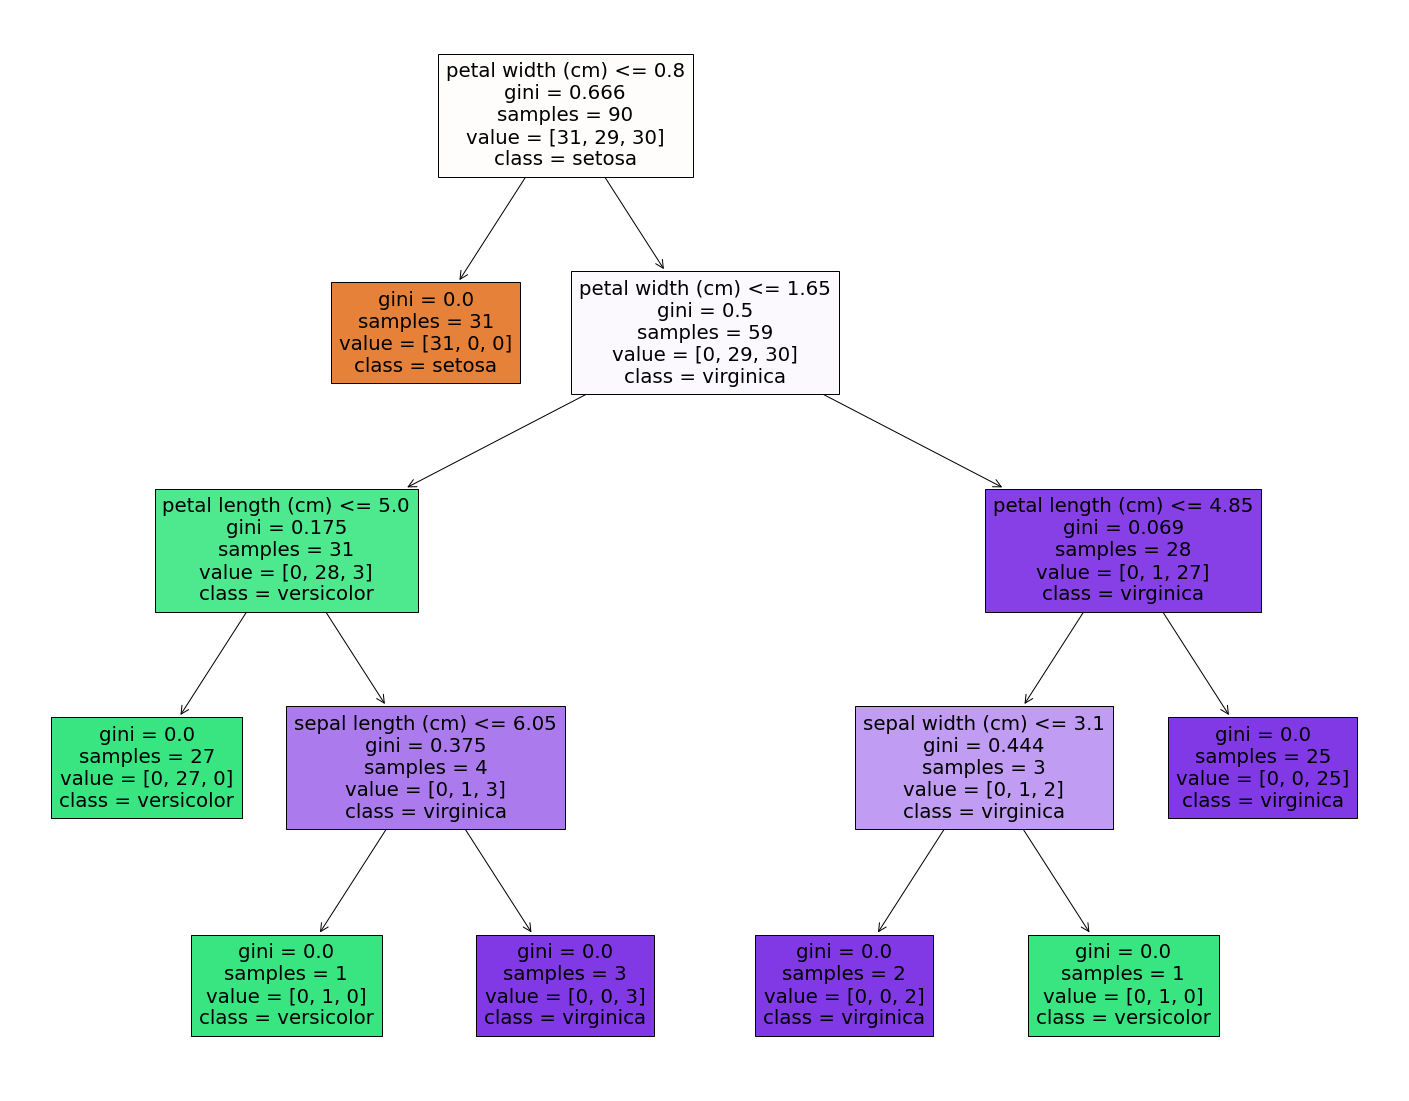

In [8]:
# Visualize the results in a beautiful manner using sklearn plot_tree
# Look documentation for modifying fonts: https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

 ##### In the above figure color of the nodes represent the majoritiy of the class

In [9]:
# TODO: Write accuracy function here
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print(acc)

0.9666666666666667


In [10]:
# TODO: Print 15 hyperparam settings along with accuracy
clf2 = DecisionTreeClassifier(criterion = "entropy")
clf2.fit(x_train, y_train)
y_pred = clf2.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("clf2 criterion = entropy:",acc)

clf3 = DecisionTreeClassifier(splitter = "random")
clf3.fit(x_train, y_train)
y_pred = clf3.predict(x_test)
acc = accuracy_score(y_test,y_pred)
print("clf3 splitter = random:",acc)

clf2 criterion = entropy: 0.9666666666666667
clf3 splitter = random: 0.9333333333333333


In [11]:
for i in range(1,122,20):    
    model = "clf{0}".format(i)
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print("max_depth {0}: has accuracy {1}".format(i,acc))

max_depth 1: has accuracy 0.65
max_depth 21: has accuracy 0.9666666666666667
max_depth 41: has accuracy 0.9666666666666667
max_depth 61: has accuracy 0.9666666666666667
max_depth 81: has accuracy 0.9666666666666667
max_depth 101: has accuracy 0.9666666666666667
max_depth 121: has accuracy 0.9666666666666667


In [12]:
for i in range(2,122,20):    
    model = "clf{0}".format(i)
    model = DecisionTreeClassifier(min_samples_split = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    print("min_samples_split {0}: has accuracy {1}".format(i,acc))

min_samples_split 2: has accuracy 0.9666666666666667
min_samples_split 22: has accuracy 0.9666666666666667
min_samples_split 42: has accuracy 0.9666666666666667
min_samples_split 62: has accuracy 0.65
min_samples_split 82: has accuracy 0.65
min_samples_split 102: has accuracy 0.31666666666666665


In [13]:
# Save the figure
fig.savefig("decistion_tree.png")

### How to visualize decision trees using graphviz

If you get runtime error with graphviz, refer to
- https://stackoverflow.com/questions/35064304/runtimeerror-make-sure-the-graphviz-executables-are-on-your-systems-path-aft

Graph visualization is a way of representing structural information as diagrams of abstract graphs and networks.

In [14]:
!pip install graphviz

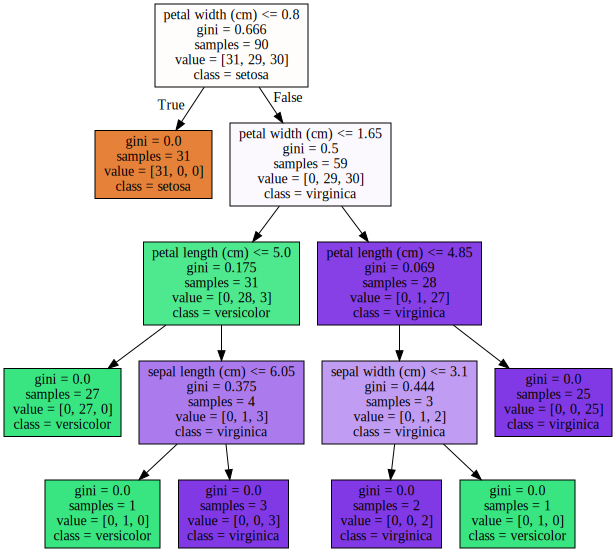

In [15]:
import graphviz
# DOT data - since graphviz accepts data in DOT we will convert our tree into a compatable format 
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [16]:
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

### Resources
- https://mljar.com/blog/visualize-decision-tree/ (source code)
- https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
- https://explained.ai/decision-tree-viz/
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html